In [33]:
import pandas as pd
import seaborn as sns
import numpy as np

df = pd.read_csv("BostonHousing.csv")
df.shape

(506, 14)

In [34]:
df.head()

,Crime_rate,zn,indus,chas,nox,rm,Age,Distance,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [35]:
df.isnull().sum()

Crime_rate    0
zn            0
indus         0
chas          0
nox           0
rm            5
Age           0
Distance      0
rad           0
tax           0
ptratio       0
b             0
lstat         0
medv          0
dtype: int64

In [36]:
df.dtypes

Crime_rate    float64
zn            float64
indus         float64
chas            int64
nox           float64
rm            float64
Age           float64
Distance      float64
rad             int64
tax             int64
ptratio       float64
b             float64
lstat         float64
medv          float64
dtype: object

In [37]:
df['rm']=df['rm'].fillna(df['rm'].mean())

In [38]:
df.isnull().sum()

Crime_rate    0
zn            0
indus         0
chas          0
nox           0
rm            0
Age           0
Distance      0
rad           0
tax           0
ptratio       0
b             0
lstat         0
medv          0
dtype: int64

In [39]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Crime_rate,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284341,0.702085,3.56100,5.885500,6.21000,6.618750,8.7800
Age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
Distance,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [48]:
df = df.drop(['chas'], axis=1)

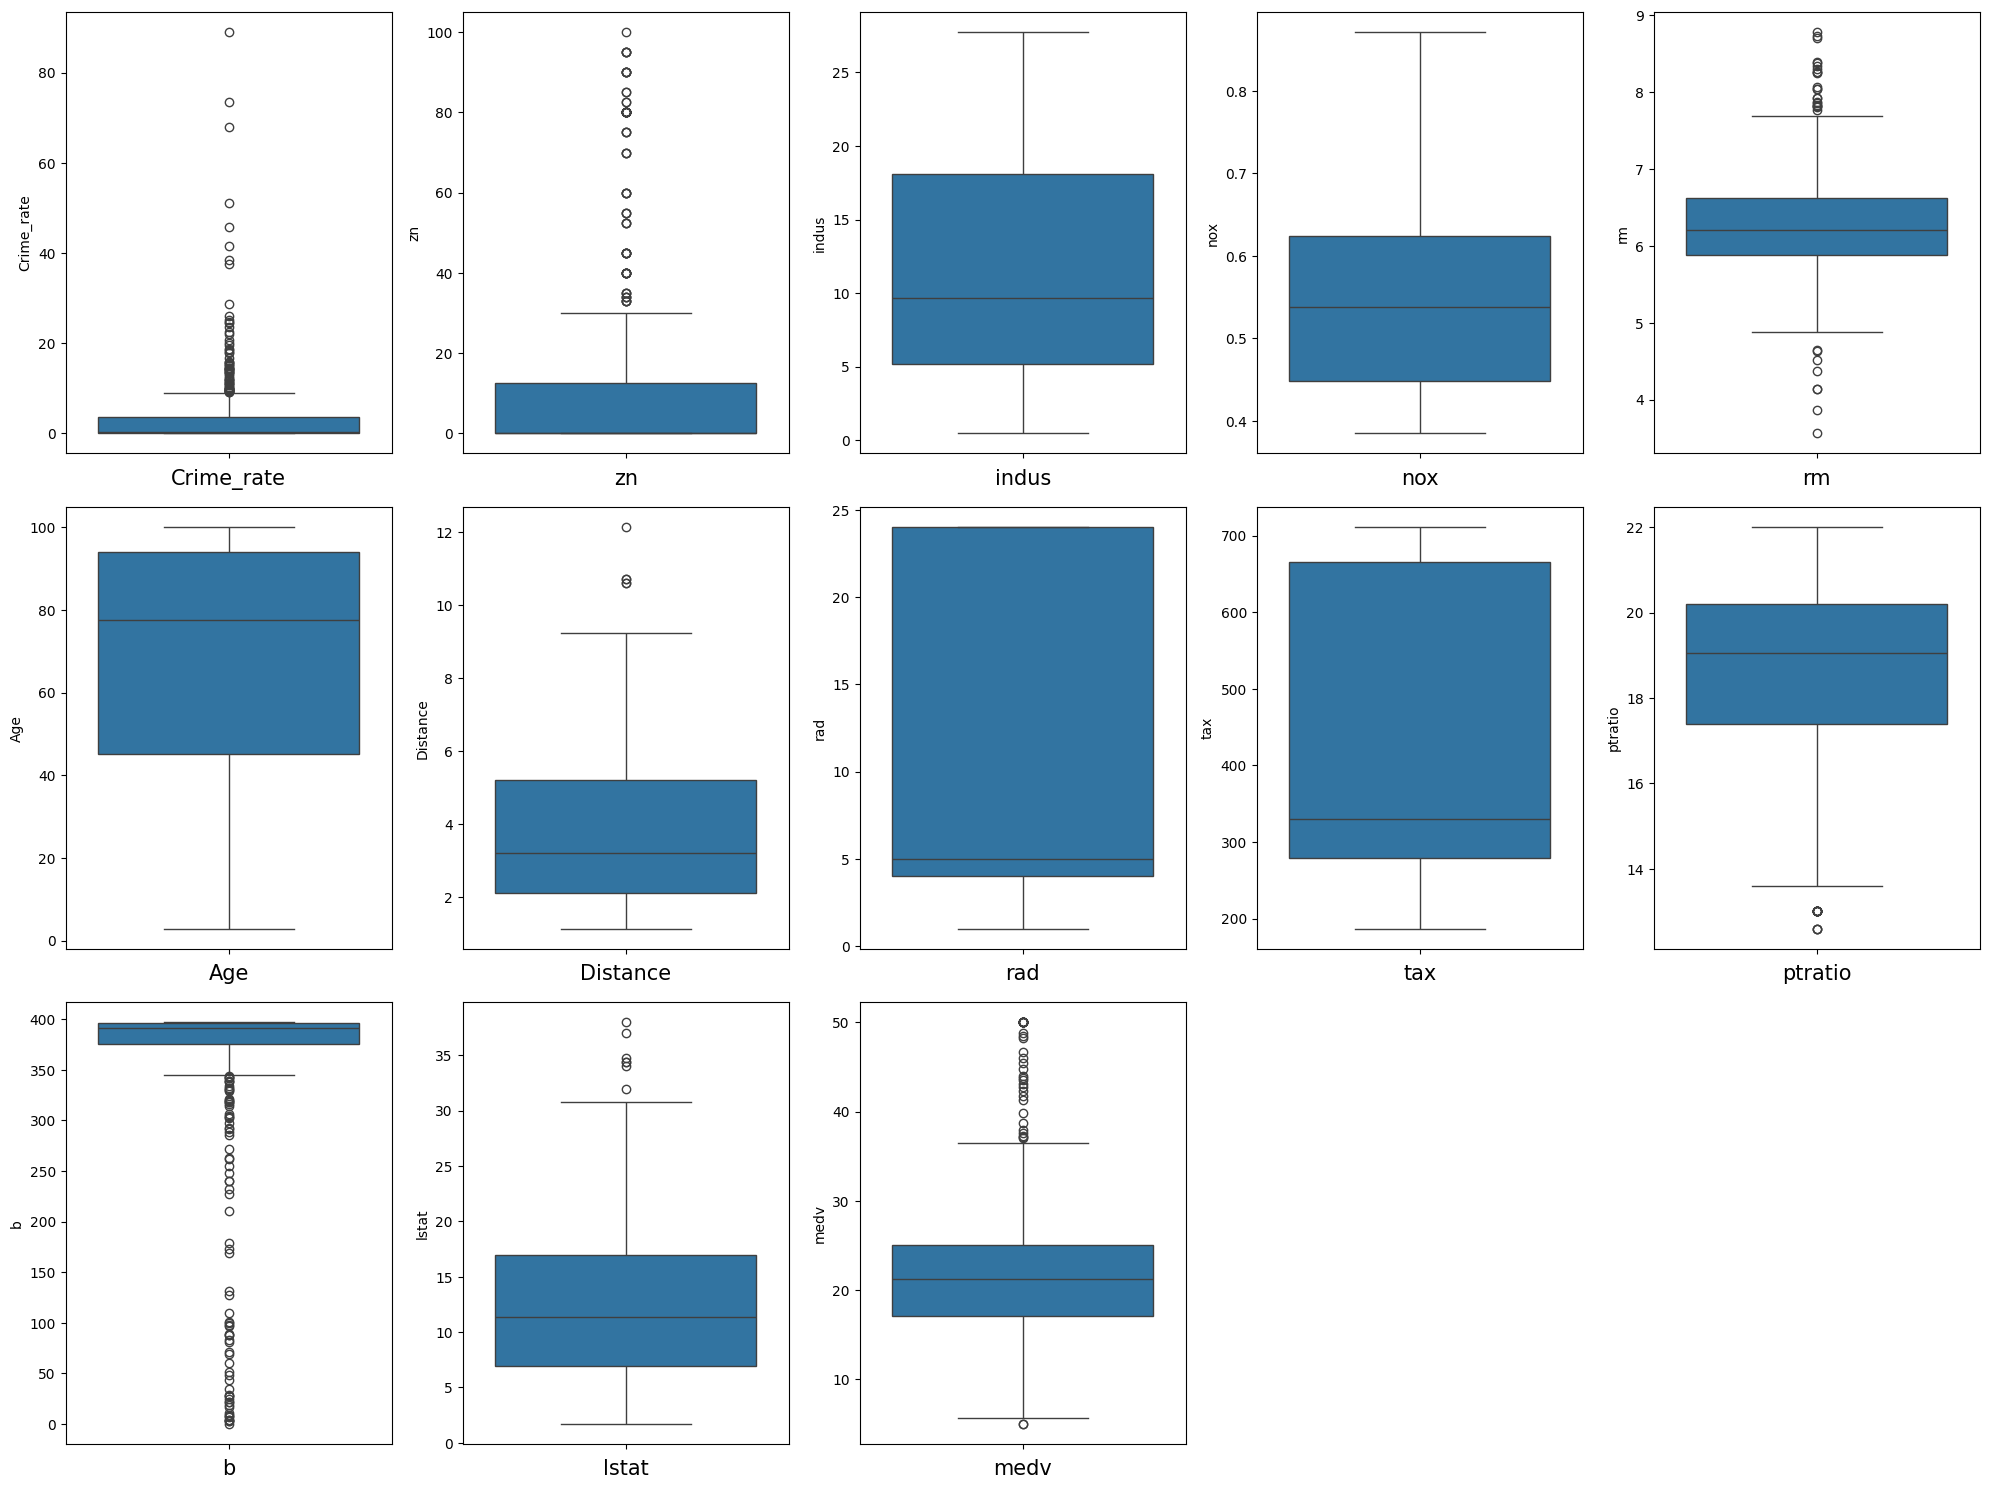

In [49]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

In [50]:
for k, v in df.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    # Filter the DataFrame to exclude outliers
    df = df.loc[(v >= q1 - 1.5 * irq) & (v <= q3 + 1.5 * irq)]


In [51]:
df.shape

(288, 13)

In [57]:
df.corr(method='pearson').sort_values(by='medv', ascending=False).transpose()

,medv,rm,Distance,zn,b,rad,ptratio,Crime_rate,tax,nox,indus,Age,lstat
Crime_rate,-0.328228,-0.059903,-0.394660,-0.210298,-0.128681,0.893373,0.246332,1.000000,0.807501,0.640895,0.506252,0.352699,0.302871
zn,0.170712,0.145171,0.598128,1.000000,0.053988,-0.116417,-0.211530,-0.210298,-0.241997,-0.398136,-0.320579,-0.327002,-0.225070
indus,-0.428978,-0.242300,-0.627678,-0.320579,-0.160408,0.424286,0.243727,0.506252,0.609910,0.692308,1.000000,0.478044,0.476468
nox,-0.427385,-0.250511,-0.708321,-0.398136,-0.183748,0.506332,0.098516,0.640895,0.622623,1.000000,0.692308,0.612131,0.503168
rm,0.659866,1.000000,0.153652,0.145171,0.101710,0.034673,-0.013422,-0.059903,-0.065208,-0.250511,-0.242300,-0.147912,-0.637495
Age,-0.455836,-0.147912,-0.612363,-0.327002,-0.079828,0.235628,0.160232,0.352699,0.358985,0.612131,0.478044,1.000000,0.571387
Distance,0.261787,0.153652,1.000000,0.598128,0.080782,-0.269546,-0.178718,-0.394660,-0.440519,-0.708321,-0.627678,-0.612363,-0.389063
rad,-0.187982,0.034673,-0.269546,-0.116417,-0.102619,1.000000,0.296001,0.893373,0.860579,0.506332,0.424286,0.235628,0.163261
tax,-0.359987,-0.065208,-0.440519,-0.241997,-0.111813,0.860579,0.330606,0.807501,1.000000,0.622623,0.609910,0.358985,0.274855
ptratio,-0.297836,-0.013422,-0.178718,-0.211530,0.079707,0.296001,1.000000,0.246332,0.330606,0.098516,0.243727,0.160232,0.047668


In [59]:
X = df[['indus', 'nox', 'rm', 'Age']]
Y = df['medv']

In [60]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size =0.2)

print("xtrain shape : ", xtrain.shape)
print("xtest shape  : ", xtest.shape)
print("ytrain shape : ", ytrain.shape)
print("ytest shape  : ", ytest.shape)

xtrain shape :  (230, 4)
xtest shape  :  (58, 4)
ytrain shape :  (230,)
ytest shape  :  (58,)


In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

print(xtrain.shape, "  ==  ", ytrain.shape)

(230, 4)   ==   (230,)


In [66]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(xtrain, ytrain)

LinearRegression()

In [69]:
y_predict = model.predict(xtest)


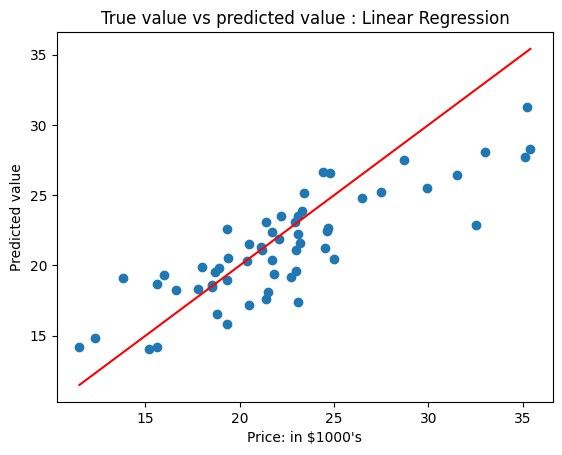

In [70]:
plt.scatter(ytest, y_predict)

ideal_values = np.linspace(min(ytest), max(ytest))  
plt.plot(ideal_values, ideal_values, color='red')

plt.xlabel("Price: in $1000's")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Linear Regression")
plt.show()

In [72]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(ytest, y_predict))
print('MSE:', metrics.mean_squared_error(ytest, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, y_predict)))

MAE: 2.3983359075259423
MSE: 9.689960235066563
RMSE: 3.112870096079591


In [83]:
from sklearn.metrics import accuracy_score
r2_score = model.score(xtest,ytest)
print(r2_score*100,'%')
model.score(xtest, ytest)

65.85058579365408 %


0.6585058579365407